<a href="https://colab.research.google.com/github/akfangus/MLproject/blob/main/ARIMA%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduvtion
예측모델 실습 소개

- 목표 : ARIMA, SARIMA 모델을 실제 데이터에 적용
- 활용 데이터1 : 공공데이터
- 활용 데이터2 : 실제 주가 예측

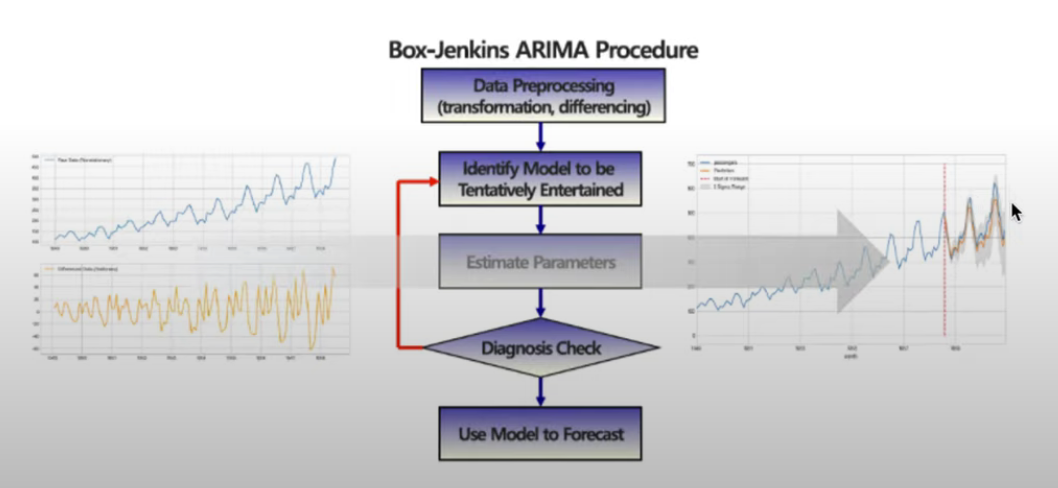

## 1. 모듈 불러오기

In [ ]:
!pip install --upgrade pip

  Attempting uninstall: pip
    Found existing installation: pip 21.2.4
    Uninstalling pip-21.2.4:
      Successfully uninstalled pip-21.2.4


ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'C:\\Users\\sh.lee\\AppData\\Local\\Temp\\pip-uninstall-j_qa_avm\\pip.exe'
Consider using the `--user` option or check the permissions.



In [ ]:
!pip install statsmodels

In [ ]:
!pip install pmdarima

In [ ]:
!pip install pandas_datareader

In [ ]:
import os
import pandas as pd
import pandas_datareader.data as pdr

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn-whitegrid')

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima

import seaborn as sns

plt.style.use('seaborn-whitegrid')
%matplotlib inline

import itertools

## 2. 데이터 불러오기
- 활용 데이터 : 공공데이터(AirPassengers.csv)
- 1949~ 1960년 매달 비행기 탑승객 수에 대한 시계열 데이터
- 데이터 구조 :ㅣ 144 * 1

In [ ]:
data = pd.read_csv('AirPassengers.csv')
data = data.rename(columns={'Month' : 'month', '#Passengers' : 'passengers'})
data['month'] = pd.to_datetime(data['month'])
data = data.set_index('month')
data

,passengers
month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


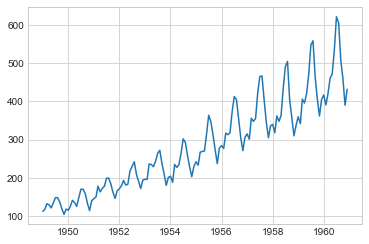

In [ ]:
plt.plot(data)

### 3. Box-Jenkins ARIMA Procedure

#### 3.1 Data Preprocessing

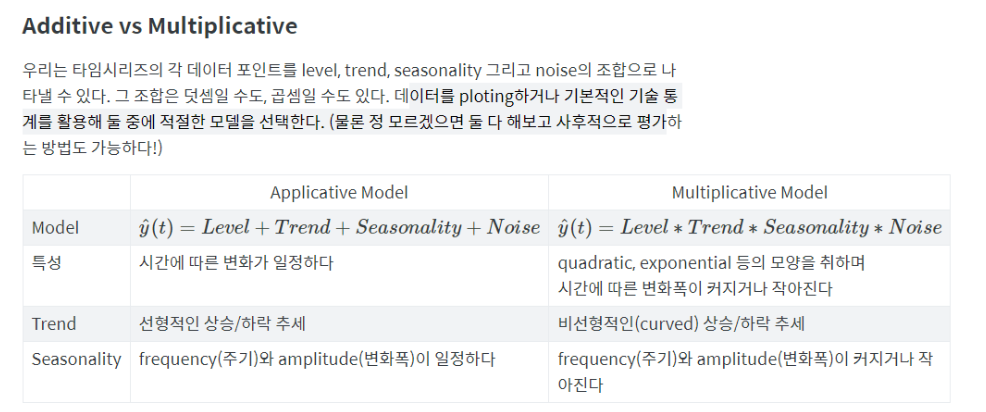

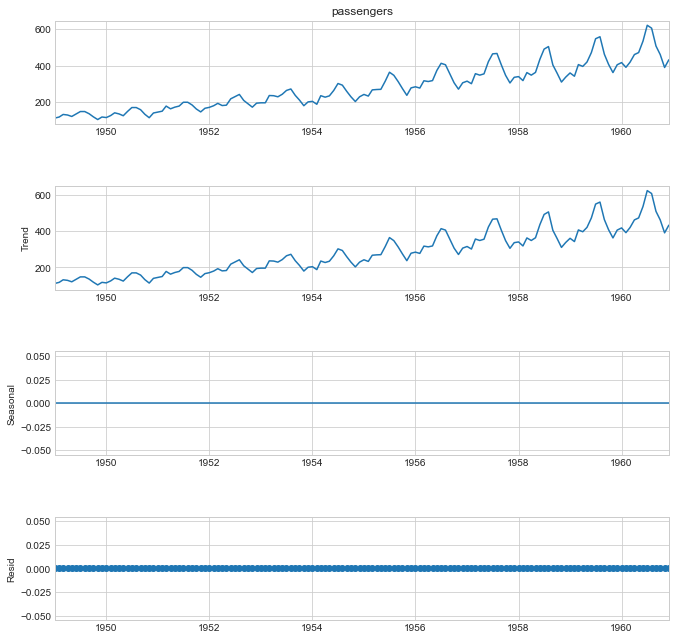

In [ ]:
'''
시계열 데이터 특성
Level + Trend + Seasonality + Noise (Error) 

'''
# Observed : observed data
# Trend : The estimated trend component
# Seasonal : The estimated seasonal component
# resid : The estimated residuals(잔차)

decompostion = sm.tsa.seasonal_decompose(data['passengers'], model='additive', period=1)
fig = decompostion.plot()
fig.set_size_inches(10,10)
plt.show()

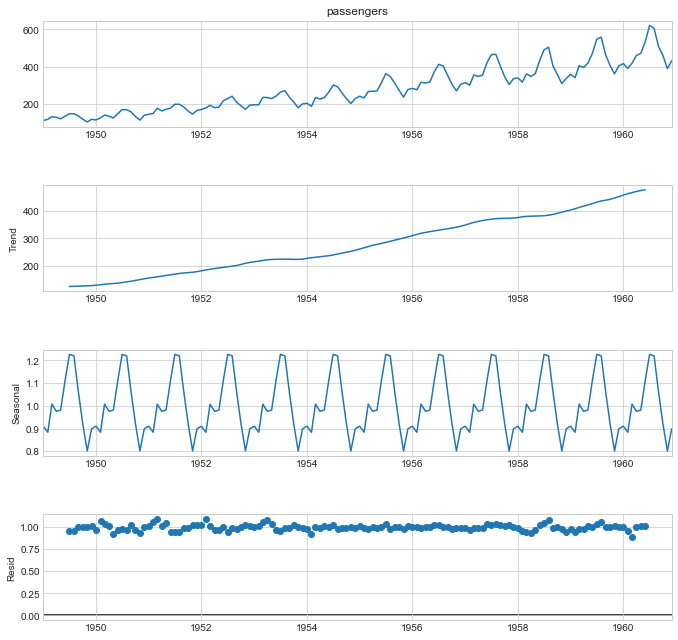

In [ ]:
result = sm.tsa.seasonal_decompose(data['passengers'], model='multiplicative')
fig = result.plot()
fig.set_size_inches(10,10)
plt.show()